In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
DF_TRAIN = pd.read_json("/content/drive/MyDrive/Colab Notebooks/PI/Twibot-20/train.json")
DF_TEST = pd.read_json("/content/drive/MyDrive/Colab Notebooks/PI/Twibot-20/test.json")

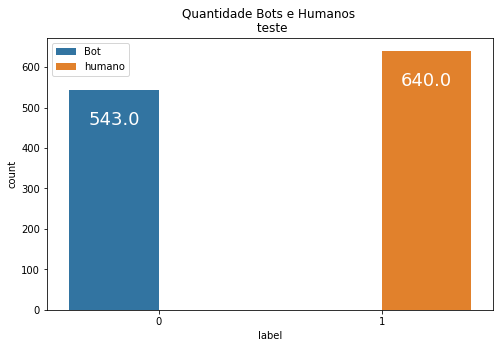

In [ ]:
plt.figure(figsize=(8,5))
g = sns.countplot(data=DF_TEST,x="label",hue="label")
g.set_title("Quantidade Bots e Humanos \n teste")
plt.legend(loc='upper left', labels=['Bot', 'humano'])
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show(g)

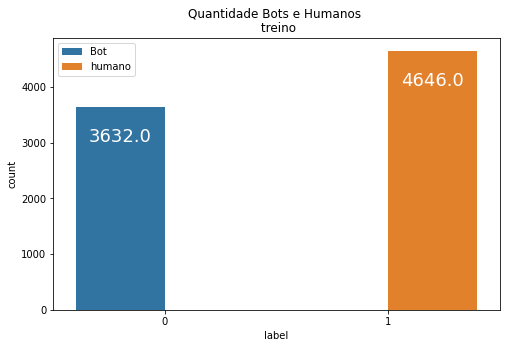

In [9]:
plt.figure(figsize=(8,5))
g = sns.countplot(data=DF_TRAIN,x="label",hue="label")
g.set_title("Quantidade Bots e Humanos \n treino")
plt.legend(loc='upper left', labels=['Bot', 'humano'])
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show(g)

# Manipulação dataset Twibot-20
Readme
```
['This dataset, named Twibot-20, is a comprehensive sample of the Twittersphere.
 'This dataset focuses on bot detection on Twitter.',
 
 'The datasets are released under MIT(https://github.com/GabrielHam/TwiBot-20/blob/main/LICENSE)',


 'The train, validation, test and support set are provided in .json format.\n',

 'The user in support set provides the neighborhood information.\n',

 'Each user sample contains:,

 "- 'ID': the ID from Twitter identifying the user.\n",
 "- 'profile': the profile information obtained from Twitter API.\n",
 "- 'tweet': the recent 200 tweets of this user.\n",
 "- 'neighbor': the random 20 followers and followings of this user.\n",
 "- 'domain': the domain of this user and the domains include politics, business, entertainment and sports.\n",
 "- 'label': the label of this user and '1' means it is a bot while '0' means it is a human."]


```



In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/PI/Twibot-20/README.txt","r") as readme:
  readme = readme.readlines()

In [ ]:
readme

['This dataset, named Twibot-20, is a comprehensive sample of the Twittersphere.\n',
 '\n',
 'This dataset focuses on bot detection on Twitter.\n',
 '\n',
 'The datasets are released under MIT(https://github.com/GabrielHam/TwiBot-20/blob/main/LICENSE)\n',
 '\n',
 'The train, validation, test and support set are provided in .json format.\n',
 '\n',
 'The user in support set provides the neighborhood information.\n',
 '\n',
 'Each user sample contains:\n',
 "- 'ID': the ID from Twitter identifying the user.\n",
 "- 'profile': the profile information obtained from Twitter API.\n",
 "- 'tweet': the recent 200 tweets of this user.\n",
 "- 'neighbor': the random 20 followers and followings of this user.\n",
 "- 'domain': the domain of this user and the domains include politics, business, entertainment and sports.\n",
 "- 'label': the label of this user and '1' means it is a bot while '0' means it is a human."]

label 0 = humano
label 1 = bot

In [ ]:
df_train = DF_TRAIN.copy()
df_test=DF_TEST.copy()

# Feature engeneering

### Train

Desdobrando a coluna profile

In [ ]:
infos = {}
df_profile = pd.DataFrame()
for linha in df_train["profile"]:
    for key in linha.keys():
      infos[key] = linha.get(key)
    df_profile = df_profile.append(infos,ignore_index=True)

In [ ]:
df_profile.head(3)

,id,id_str,name,screen_name,location,profile_location,description,url,entities,protected,...,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,17461978,17461978,SHAQ,SHAQ,"Orlando, FL","{'id': '55b4f9e5c516e0b6', 'url': 'https://api...","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",https://t.co/7hsiK8cCKW,{'url': {'urls': [{'url': 'https://t.co/7hsiK8...,False,...,http://pbs.twimg.com/profile_images/1673907275...,https://pbs.twimg.com/profile_images/167390727...,2FC2EF,181A1E,252429,666666,True,False,False,False
1,1297437077403885568,1297437077403885568,Jennifer Fishpaw,JenniferFishpaw,,None,,None,{'description': {'urls': []}},False,...,http://pbs.twimg.com/profile_images/1297437406...,https://pbs.twimg.com/profile_images/129743740...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False
2,17685258,17685258,Brad Parscale,parscale,Florida,None,Owner @ Parscale Strategy. Senior Advisor Digi...,https://t.co/GooZcYDqFg,{'url': {'urls': [{'url': 'https://t.co/GooZcY...,False,...,http://pbs.twimg.com/profile_images/1295453225...,https://pbs.twimg.com/profile_images/129545322...,AB2316,FFFFFF,FFFFFF,666666,False,False,False,False


In [ ]:
df_profile.shape

(8278, 38)

In [ ]:
df_profile.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'profile_location',
       'description', 'url', 'entities', 'protected', 'followers_count',
       'friends_count', 'listed_count', 'created_at', 'favourites_count',
       'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count',
       'lang', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image'],
      dtype='object')

Ao ler a documentação [documentação do twitter](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user) podemos entender o significado das features na coluna profile.
As colunas que podem ser aproveitadas no modelo são:


1. location (se tem ou não)
2. followers_count [The number of followers] e friends_count [nº of users this account is following (AKA their “followings”).] (followers friends ratio /ff ratio)
3. geo_enabled
4. verified
5. statuses_counts (numero de posts)
6. default_profile (True, the user has not altered the theme or background of their user profile.)
7. default_profile_image (True = perfil com foto padrão inicial)
8. created_at será a idade do perfil

In [ ]:
#Created at
from datetime import datetime

def diff_month(d1, d2):
    return (d2.year - d1.year) * 12 + d2.month - d1.month

df_profile.created_at = pd.to_datetime(df_profile.created_at)

profile_age=[]
for date in df_profile.created_at:
  profile_age.append(diff_month(date,datetime.now()))

df_train["profile_m_age"] = profile_age

In [ ]:
#statuses
df_train["statuses_count"] = df_profile["statuses_count"].astype(int)
#twt freq count
df_train["tweet_freq"] = df_profile["statuses_count"].astype(int) / df_train["profile_m_age"]

#len
df_train["name_length"] = [len(x) for x in df_profile.name]
df_train["screen_name_length"] = [len(x) for x in df_profile.screen_name]
df_train["description_length"] = [len(x) for x in df_profile.description]

Vamos criar as features ff ratio, links contagem, @ contagem

ff ratio
É a razão entre as pessoas que você segue (friends) dividido pelas pessoas que seguem você (followers). Como dito no paper *A one-class classification approach for bot detection on Twitter*

In [ ]:
df_train["friends_count"] = df_profile["friends_count"].astype(int)
df_train["followers_count"] = df_profile["followers_count"].astype(int)

df_train["friends_followers_ratio"] = df_train["friends_count"] / df_train["followers_count"]

In [ ]:
#taxa de crescimento followers e friend
df_train["followers_growth_rate"] = df_train["followers_count"] / df_train["profile_m_age"]
df_train["friends_growth_rate"] = df_train["friends_count"] / df_train["profile_m_age"]

#favourites / listed rate
df_train["favourites_count"]  =  df_profile["favourites_count"].astype(int)
df_train["favourites_growth_rate"]  =  df_profile["favourites_count"].astype(int) / df_train["profile_m_age"]
df_train["listed_count"] = df_profile["listed_count"].astype(int)
df_train["listed_growth_rate"]  =  df_profile["listed_count"].astype(int) / df_train["profile_m_age"]

In [ ]:
#default profile
df_train["default_profile"] = df_profile["default_profile"]
#background img
df_train["use_background_img"]= df_profile.profile_background_image_url

#location
df_train["location"] = df_profile["location"]
#geo_enable
df_train["geo_enable"] = df_profile["geo_enabled"]
#verified
df_train["verified"] = df_profile["verified"]
#d profile img
df_train["default_profile_image"] = df_profile["default_profile_image"]

In [ ]:
df_train["tweet"][0][0][df_train["tweet"][0][0].find("RT @"):].split()[1]

'@CarnivalCruise:'

links e @ contagem

In [ ]:
repeated_mentions_count = []
repeated_urls_count = []
repeated_hashtag_count = []


mentions_count = []
urls_count = []
hashtag_count = [] ##**


# para saber em qual linha teve repetido
linhas_no_df = -1

# iterando sobre as linhas da coluna tweet, cada linha possui uma lista de valores
for rows in df_train["tweet"]:
  linhas_no_df +=1
  #criando as listas temporarias para cada linha
  mentions = []
  urls = []
  hashtags = []

  # temos linhas com valor None então
  if rows != None:
    # iterando sobre cada objeto da lista contida na linha selecionada
    for line in rows:
      # separando cada elemento da lista em sublistas, como @ e url não podem ter espaços vamos de .split()
      # assim da para checar mais de uma url / @ em cada lista
      line = line.split()
      # se encontrar @/url no objeto salva na lista temporaria correspondente
      for i in line:
        if "@" in i:
          txt = i[ i.find( "@" ) : ].split()[0]
          #print("@ encontrado", txt)
          mentions.append( txt )

        elif "http" in i:
          url = i[ i.find( "http") : ].split()[0]
          #print("URL encontrada", url)
          urls.append(url)
        elif "#" in i:
          hashtag = i[ i.find( "@" ) : ].split()[0]
          hashtags.append(hashtag)

  
  # salvando a quantidade de @, urls e # encontrados
  mentions_count.append(len(mentions))
  urls_count.append(len(urls))
  hashtag_count.append(len(hashtags))


# checando por repeticoes de valores dentro das listas temporarias
  repeticoes = 0  
  for i in mentions:
    if mentions.count(i) > 1:
      #print(f"A linha {linhas_no_df} POSSUI @ REPETIDO -> ",i)
      repeticoes+=1
  repeated_mentions_count.append(repeticoes)
  
  repeticoes = 0
  for u in urls:
    if urls.count(u) > 1:
      #print(f"A linha {linhas_no_df} POSSUI URL REPETIDA -> ",u)
      repeticoes+=1
  repeated_urls_count.append(repeticoes)

  repeticoes = 0
  for hash in hashtags:
    if hashtags.count(hash) > 1:
      #print(f"A linha {linhas_no_df} POSSUI URL REPETIDA -> ",u)
      repeticoes+=1
  repeated_hashtag_count.append(repeticoes)

In [ ]:
df_train["url mencionada"] = urls_count
df_train["url repetida"] = repeated_urls_count
df_train["@ mencionado"] = mentions_count
df_train["@ repetido"] = repeated_mentions_count
df_train["# mencionadas"] = hashtag_count
df_train["# repetida"] = repeated_hashtag_count

### Test

desdobrando profile

In [ ]:
infos = {}
df_profile = pd.DataFrame()
for linha in df_test["profile"]:
    for key in linha.keys():
      infos[key] = linha.get(key)
    df_profile = df_profile.append(infos,ignore_index=True)

In [ ]:
#Created at
from datetime import datetime

def diff_month(d1, d2):
    return (d2.year - d1.year) * 12 + d1.month - d2.month

df_profile.created_at = pd.to_datetime(df_profile.created_at)

profile_age=[]
for date in df_profile.created_at:
  profile_age.append(diff_month(date,datetime.now()))

df_test["profile_m_age"] = profile_age

In [ ]:
#twt freq count
df_test["statuses_count"] = df_profile["statuses_count"].astype(int)
df_test["tweet_freq"] = df_profile["statuses_count"].astype(int) / df_test["profile_m_age"]

#len
df_test["name_length"] = [len(x) for x in df_profile.name]
df_test["screen_name_length"] = [len(x) for x in df_profile.screen_name]
df_test["description_length"] = [len(x) for x in df_profile.description]

In [ ]:
df_test["friends_count"] = df_profile["friends_count"].astype(int)
df_test["followers_count"] = df_profile["followers_count"].astype(int)

df_test["friends_followers_ratio"] = df_test["friends_count"] / df_test["followers_count"]

In [ ]:
#taxa de crescimento followers e friend
df_test["followers_growth_rate"] = df_test["followers_count"] / df_test["profile_m_age"]
df_test["friends_growth_rate"] = df_test["friends_count"] / df_test["profile_m_age"]

#favourites / listed rate
df_test["favourites_count"]  =  df_profile["favourites_count"].astype(int)
df_test["favourites_growth_rate"]  =  df_profile["favourites_count"].astype(int) / df_test["profile_m_age"]

df_test["listed_count"] = df_profile["listed_count"].astype(int)
df_test["listed_growth_rate"]  =  df_profile["listed_count"].astype(int) / df_test["profile_m_age"]

In [ ]:
#default profile
df_test["default_profile"] = df_profile["default_profile"]
#background img
df_test["use_background_img"]= df_profile.profile_background_image_url

#location
df_test["location"] = df_profile["location"]
#geo_enable
df_test["geo_enable"] = df_profile["geo_enabled"]
#verified
df_test["verified"] = df_profile["verified"]
#d profile img
df_test["default_profile_image"] = df_profile["default_profile_image"]

In [ ]:
repeated_mentions_count = []
repeated_urls_count = []
repeated_hashtag_count = []


mentions_count = []
urls_count = []
hashtag_count = [] ##**


# para saber em qual linha teve repetido
linhas_no_df = -1

# iterando sobre as linhas da coluna tweet, cada linha possui uma lista de valores
for rows in df_test["tweet"]:
  linhas_no_df +=1
  #criando as listas temporarias para cada linha
  mentions = []
  urls = []
  hashtags = []

  # temos linhas com valor None então
  if rows != None:
    # iterando sobre cada objeto da lista contida na linha selecionada
    for line in rows:
      # separando cada elemento da lista em sublistas, como @ e url não podem ter espaços vamos de .split()
      # assim da para checar mais de uma url / @ em cada lista
      line = line.split()
      # se encontrar @/url no objeto salva na lista temporaria correspondente
      for i in line:
        if "@" in i:
          txt = i[ i.find( "@" ) : ].split()[0]
          #print("@ encontrado", txt)
          mentions.append( txt )

        elif "http" in i:
          url = i[ i.find( "http") : ].split()[0]
          #print("URL encontrada", url)
          urls.append(url)
        elif "#" in i:
          hashtag = i[ i.find( "@" ) : ].split()[0]
          hashtags.append(hashtag)

  
  # salvando a quantidade de @, urls e # encontrados
  mentions_count.append(len(mentions))
  urls_count.append(len(urls))
  hashtag_count.append(len(hashtags))


# checando por repeticoes de valores dentro das listas temporarias
  repeticoes = 0  
  for i in mentions:
    if mentions.count(i) > 1:
      #print(f"A linha {linhas_no_df} POSSUI @ REPETIDO -> ",i)
      repeticoes+=1
  repeated_mentions_count.append(repeticoes)
  
  repeticoes = 0
  for u in urls:
    if urls.count(u) > 1:
      #print(f"A linha {linhas_no_df} POSSUI URL REPETIDA -> ",u)
      repeticoes+=1
  repeated_urls_count.append(repeticoes)

  repeticoes = 0
  for hash in hashtags:
    if hashtags.count(hash) > 1:
      #print(f"A linha {linhas_no_df} POSSUI URL REPETIDA -> ",u)
      repeticoes+=1
  repeated_hashtag_count.append(repeticoes)

In [ ]:
df_test["url mencionada"] = urls_count
df_test["url repetida"] = repeated_urls_count
df_test["@ mencionado"] = mentions_count
df_test["@ repetido"] = repeated_mentions_count
df_test["# mencionadas"] = hashtag_count
df_test["# repetida"] = repeated_hashtag_count

## Dummyzação

coluna location

In [ ]:
df_train[["location"]]

,location
0,"Orlando, FL"
1,
2,Florida
3,"Tampa, FL"
4,"Jacksonville Beach, FL"
...,...
8273,
8274,
8275,"Florida, USA"
8276,"New York, USA"


Como 1 é bot e 0 é humano
Se tiver localização descrita será 0 senão será 1

In [ ]:
df_train["location"] = df_train["location"].apply([lambda x: 0 if (x != " ") and  (x != "") else 1 ])
df_test["location"] = df_test["location"].apply([lambda x: 0 if x != " " and  (x != "") else 1])

geo_enabled	verified default_profile	default_profile_image background_image
Se tiver será 0 senão será 1

In [ ]:
df_train["use_background_img"] = df_train["use_background_img"].apply([lambda x: 1 if x == "None" else 0 ])
df_test["use_background_img"] = df_test["use_background_img"].apply([lambda x: 1 if x == "None" else 0 ])

In [ ]:
df_train["geo_enable"] = df_train["geo_enable"].apply([lambda x: 1 if x != "True" else 0 ])
df_test["geo_enable"] = df_test["geo_enable"].apply([lambda x: 1 if x != "True" else 0 ])

In [ ]:
df_train["default_profile"] = df_train["default_profile"].apply([lambda x: 1 if x != "True" else 0 ])
df_test["default_profile"] = df_test["default_profile"].apply([lambda x: 1 if x != "True" else 0 ])

In [ ]:
df_train["default_profile_image"] = df_train["default_profile_image"].apply([lambda x: 1 if x != "True" else 0 ])
df_test["default_profile_image"] = df_test["default_profile_image"].apply([lambda x: 1 if x != "True" else 0 ])

In [ ]:
df_train["verified"] = df_train["verified"].apply([lambda x: 1 if x != "True" else 0 ])
df_test["verified"] = df_test["verified"].apply([lambda x: 1 if x == "True" else 0 ])

In [ ]:
df_test.head()

,ID,profile,tweet,neighbor,domain,label,profile_m_age,statuses_count,tweet_freq,name_length,...,location,geo_enable,verified,default_profile_image,url mencionada,url repetida,@ mencionado,@ repetido,# mencionadas,# repetida
0,1188812492010487808,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,None,"[Politics, Sports]",1,40,49757,1243.925000,21,...,0,1,0,1,56,2,277,103,22,17
1,155659213,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...",None,"[Politics, Business, Entertainment, Sports]",0,144,3569,24.784722,18,...,0,1,0,1,216,4,33,9,163,156
2,147725246,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,"{'following': ['36734275', '20713061', '755419...",[Politics],0,143,73786,515.986014,15,...,0,1,0,1,197,111,249,216,15,11
3,1296248637194895360,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...","{'following': ['87818409', '41390292', '140910...",[Politics],1,26,2,0.076923,12,...,0,1,0,1,0,0,1,0,0,0
4,1339835893,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,None,"[Politics, Business, Entertainment, Sports]",0,106,11945,112.688679,16,...,0,1,0,1,165,11,173,77,41,32


In [ ]:
df_test.head()

,ID,profile,tweet,neighbor,domain,label,profile_m_age,statuses_count,tweet_freq,name_length,...,location,geo_enable,verified,default_profile_image,url mencionada,url repetida,@ mencionado,@ repetido,# mencionadas,# repetida
0,1188812492010487808,"{'id': '1188812492010487808 ', 'id_str': '1188...",[RT @clevelanddotcom: Three Ohio House Republi...,None,"[Politics, Sports]",1,40,49757,1243.925000,21,...,0,1,0,1,56,2,277,103,22,17
1,155659213,"{'id': '155659213 ', 'id_str': '155659213 ', '...","[We touch our hair 96 times a day on average, ...",None,"[Politics, Business, Entertainment, Sports]",0,144,3569,24.784722,18,...,0,1,0,1,216,4,33,9,163,156
2,147725246,"{'id': '147725246 ', 'id_str': '147725246 ', '...",['He Looked Like He Knew What He Was Doing': C...,"{'following': ['36734275', '20713061', '755419...",[Politics],0,143,73786,515.986014,15,...,0,1,0,1,197,111,249,216,15,11
3,1296248637194895360,"{'id': '1296248637194895360 ', 'id_str': '1296...","[Estamos abiertos a colaboraciones, por lo cuá...","{'following': ['87818409', '41390292', '140910...",[Politics],1,26,2,0.076923,12,...,0,1,0,1,0,0,1,0,0,0
4,1339835893,"{'id': '1339835893 ', 'id_str': '1339835893 ',...",[The suffragists chose purple and gold to repr...,None,"[Politics, Business, Entertainment, Sports]",0,106,11945,112.688679,16,...,0,1,0,1,165,11,173,77,41,32


In [ ]:
#dropando coluans desnecessárias
df_train.drop(["profile_m_age","profile","ID","neighbor"],axis=1,inplace=True)
df_test.drop(["profile_m_age","profile","ID","neighbor"],axis=1,inplace=True)

## Checagem colunas Treino / teste

In [ ]:
for i in df_train.columns:
  if i not in df_test.columns:
    print("TA ERRADO")
    print(i)

In [ ]:
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
df_train.shape

(8278, 29)

In [ ]:
 DF_TRAIN.shape

(8278, 6)

##Salvando o data set

In [ ]:
#DATASET SEM DEV
df_train.to_csv("/content/drive/MyDrive/Colab Notebooks/PI/dados twitbot sem dev/train_twitbot_model.csv")
df_test.to_csv("/content/drive/MyDrive/Colab Notebooks/PI/dados twitbot sem dev/test_twitbot_model.csv")